This Jupyter Notebook contains an example of how to use the MHAR python package.

It can also Run in Colab.


## Avoid Colab timeout:  


Avoid turning off your notebook or timeout sessions using this:
 
Mozilla:
  type:
  >ctrl + shift + i
 
  Go to console 
 
  Paste and run this:
```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
```



# Installation

In [1]:
!pip install mhar

  Created wheel for mhar: filename=mhar-0.0.2-py3-none-any.whl size=6348 sha256=991296fae6bfef24691075c8887210ac89c0d1878547866daf74575317de6795
  Stored in directory: /root/.cache/pip/wheels/aa/03/f7/eead6858fd602c54e1f9ef5dfc7caa6c5f916ebbc412bb136d
Successfully built mhar


In [2]:
from mhar import walk
from mhar import mhar_example

**Test everything is working perfectly**

In [3]:
mhar_example()

Using device: cuda
n:  3   mi: 6   me: 0   z: 3
Hypercube
torch.Size([300, 3]) 9.95308542251587
-----------------------------------
n:  3   mi: 3   me: 1   z: 5
Max non zero error:  tensor(0., device='cuda:0')
Simplex
torch.Size([500, 3]) 0.9836978912353516


# Definition of a Polytope

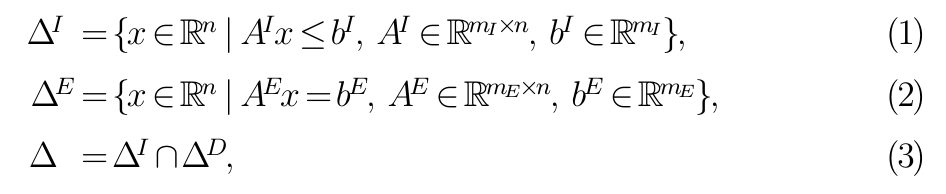

# Sample a 3-Hypercube

Create the description of the hypercube using the Inequalities matrices:

### AX <= b

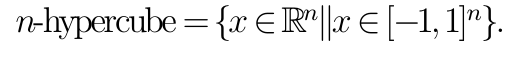

In [ ]:
import numpy as np
import torch

# Using Numpy 

# Inequality Matrix AI
ai = [[1.0, 0.0, 0.0],
      [0.0, 1.0, 0.0],
      [0.0, 0.0, 1.0],
      [-1.0, 0.0, 0.0],
      [0.0, -1.0, 0.0],
      [0.0, 0.0, -1.0]]
ai = torch.tensor(ai)
ai = ai.type(torch.DoubleTensor)
# Inequality Vector bI
bi = [[1.0],
      [1.0],
      [1.0],
      [1.0],
      [1.0],
      [1.0]]
bi = torch.tensor(bi)
bi = bi.type(torch.DoubleTensor)

# Inner Point
x_0 = [[0.0],
      [0.0],
      [0.0]]
x_0 = torch.tensor(x_0)
x_0 = x_0.type(torch.DoubleTensor)

print(ai.shape)
print(bi.shape)
print(x_0.shape)

torch.Size([6, 3])
torch.Size([6, 1])
torch.Size([3, 1])


# Testing Playground

If you want to sample bigger polytopes, change the parameter **n**.  
Increase the padding using the parameter **z**.


In [ ]:
# Directly in pytorch
n = 3
z = 5


torch.Size([6, 3])
torch.Size([6, 1])
torch.Size([3, 1])


In [ ]:
# Create Inequalities
hyper_ai = torch.cat((torch.eye(n), torch.eye(n) * -1.0), dim=0)
hyper_bi = torch.from_numpy(np.array([1] * 2 * n))[:, None]
x_0 = torch.empty(n, 1, dtype=torch.get_default_dtype())
x_0.fill_(0.00)

print(hyper_ai.shape)
print(hyper_bi.shape)
print(x_0.shape)

Total number of sampled/saved iid points: T * z  
Total number of sampled points: (T * z * thinning) + (warm * z * thinning) 


In [ ]:
X = walk(z=5, # Padding Parameter
     ai=ai, # Inequality matrix
     bi=bi, # Inequaliy restrictions
     ae=torch.empty(0), # Equality Matrix
     be=torch.empty(0), # Equality restriction
     x_0=x_0, # Inner Point of the polytope
     T=1, # Number of iid Iterations
     device='cpu', # Device to use cpu or cuda
     warm=0, # Number of iid iterations to burn before saving samples
     seed=None, # Automatic random seed
     thinning=None # Automatic thinning factor of O(n^3)
     )
print(X)
print(X.shape)

n:  3   mi: 6   me: 0   z: 5
Automatic Thinning factor:  27
tensor([[ 0.9028, -0.1089, -0.2004],
        [-0.0280,  0.2746,  0.9510],
        [-0.7870, -0.8997, -0.3614],
        [ 0.3050, -0.9973,  0.3018],
        [-0.2810,  0.5646, -0.3507]])
torch.Size([5, 3])
